In [57]:
from fastai.vision.all import *
import datetime
import fastai
import json

In [58]:
torch.cuda.set_device(5)

In [59]:
batch_tfms = aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data_block = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path = "./Dataset/DR_Updated/Database_Random"
data_loader = data_block.dataloaders(path)

In [60]:
learner = cnn_learner(data_loader, fastai.vision.models.resnet152, metrics=[accuracy])

In [61]:
learner.load("stage-7a")

In [55]:
data_block2 = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path2 =  "./Dataset/DR_Updated/Database_Random"
data_loader2 = data_block2.dataloaders(path)
print(data_loader2)

In [56]:
learner.dls = data_loader2

SuggestedLRs(valley=0.0008317637839354575)

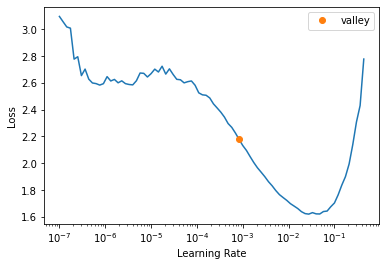

In [62]:
learner.lr_find()

In [63]:
lr = 1e-4
learner.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.475057,2.336153,0.613445,00:09
1,2.060605,1.258883,0.714286,00:09
2,1.669866,0.968642,0.747899,00:09
3,1.444603,0.885169,0.756303,00:09
4,1.294278,0.865166,0.752101,00:09


In [64]:
learner.save("stage-10")

Path('models/stage-10.pth')

SuggestedLRs(valley=6.30957365501672e-05)

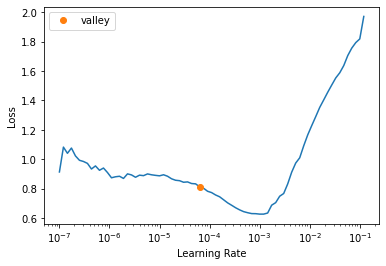

In [65]:
learner.unfreeze()
learner.lr_find()

In [66]:
learner.fit_one_cycle(10, slice(1e-4,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.981797,0.717520,0.785714,00:09
1,0.747197,0.426225,0.844538,00:10
2,0.559510,0.289793,0.899160,00:10
3,0.419332,0.233650,0.920168,00:10
4,0.331437,0.217503,0.924370,00:09
5,0.258080,0.189851,0.941176,00:10
6,0.216356,0.185874,0.936975,00:10
7,0.173794,0.180381,0.941176,00:10
8,0.144206,0.174594,0.945378,00:10
9,0.124015,0.179431,0.941176,00:10


In [67]:
#learner.save("stage-8a")
results= {}
start = torch.cuda.Event(enable_timing=True)
end =  torch.cuda.Event(enable_timing=True)
results["prediction"] = []
results["time"]=[]
results["truth"] = []

In [76]:
fnames = get_image_files("./Dataset/DG_Updated/Dataset_Google")
print(str(fnames[0].parent).replace('Dataset/DG_Updated/Dataset_Google/',''))

black_grass


In [79]:
classified_result = []
timings = []
ground_truth = []
i=0
for file in fnames:
    with torch.no_grad():
          #torch.cuda.synchronize()
        #start.record()
        result = learner.predict(file)
        #end.record()
        #torch.cuda.synchronize()
        classified_result.append(str(result[0]))
        #in milliseconds
        #timings.append(start.elapsed_time(end))
        ground_truth.append(str(file.parent).replace('Dataset/DG_Updated/Dataset_Google/','')) 
    i+=1
results["prediction"] = classified_result
#results["time"]=timings
results["truth"] = ground_truth
with open('data.json', 'w') as fp:
        json.dump(results, fp)

In [ ]:
print(results)

In [80]:
total_correct = 0
total_wrong = 0
for i in range(len(results["prediction"])):
    if(results["prediction"][i]==results["truth"][i]):
        total_correct +=1
    else:
        total_wrong +=1
print(total_correct)
print(total_wrong)

214
26


In [81]:
total_correct/(total_wrong+total_correct)

0.8916666666666667

In [72]:
learner.save("stage-10a")

Path('models/stage-10a.pth')